The K Means Algorithm is:
Choose a number of clusters “K”
Randomly assign each point to Cluster
Until cluster stop changing, repeat the following
For each cluster, compute the centroid of the cluster by taking the mean vector of the points in the cluster.
Assign each data point to the cluster for which the centroid is closest

In [1]:
import os as os

In [2]:
os.getcwd()

'/Users/rahulsingh/Desktop/Python'

In [3]:
os.listdir()

['foo.csv',
 'AirPassengers.csv',
 'ablone.csv',
 'Credit_Risk_Validate_data.csv',
 '.DS_Store',
 'p.csv',
 'InClassExerciseonExploratoryDataAnalysiswithPython',
 'Super Store.csv',
 'Project on logistic regression.ipynb',
 'TSA -superstore project.ipynb',
 'Untitled.ipynb',
 'Cab_Rides.csv',
 '2016_Book_IntroductionToTimeSeriesAndFor.pdf',
 'Dimensionality reduction with linear regression.ipynb',
 'Numpy and pandas.ipynb',
 'Python pdf.rtfd',
 'Practice on time series.ipynb',
 'Dimensionality reduction project.ipynb',
 'Control structures in Python.ipynb',
 'Importing data frame from web.ipynb',
 'Property_Price_Train.csv',
 'Untitled2.ipynb',
 'Factor analysis .ipynb',
 'cancerdata.csv',
 'Time series analysis bOOK.pdf',
 'Problem Statement copy.docx',
 'Naive Bayes Approach.ipynb',
 '2016_Book_TimeSeriesEconometrics.pdf',
 'untitled.txt',
 'BankCreditCard.csv',
 'TSA_Furniture_Sales-Copy1 april 2021.ipynb',
 'Super Store.csv1.csv',
 'Factor analysis -class.ipynb',
 'Credit_Risk_Trai

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
data=pd.read_csv('snsdata.csv')
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [6]:
data.describe(include='all')

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,27276,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.500000,NaN,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,NaN,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,NaN,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,NaN,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,NaN,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,NaN,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [8]:
data['gender'].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [9]:
data['gender'].value_counts(dropna=False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [10]:
data['gender'].fillna('not disclosed',inplace=True)
#replacing the nan values with 'not disclosed'

In [11]:
data['gender'].isnull().sum()

0

In [12]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [13]:
#from the above summary we can observe that the mean age differs by roughly one year per change in graduation year

In [14]:
data['age']=data.groupby('gradyear').transform(lambda x:x.fillna(x.mean()))

In [15]:
data['age'].isnull().sum()

0

In [16]:
#rechecking missing values 
data.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

<AxesSubplot:xlabel='age'>

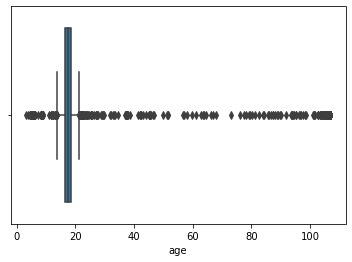

In [17]:
#checking the outliers
sns.boxplot(data['age'])

In [18]:
q1=data['age'].quantile(0.25)
q3=data['age'].quantile(0.75)
iqr=q3-q1
print(iqr)

1.887459224069687


In [19]:
df=data[(data['age']>(q1-1.5*iqr))&(data['age']<(q3+1.5*iqr))]

In [20]:
df['age'].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

In [21]:
df.shape

(29633, 40)

<AxesSubplot:xlabel='age'>

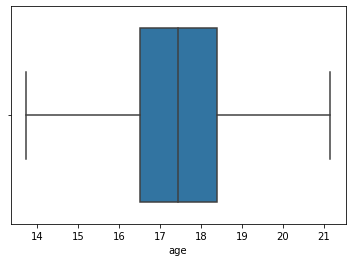

In [22]:
sns.boxplot(df['age'])

In [23]:
#data preprocessing

names=df.columns[4:40]
scaled_feature=data.copy() # we are shallow copying the data
names

# we are standardising only columns 5:39 and hence we have created seperated data
#as these are words and we need to standardise the data
#deep copy and shallow copy - explore

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

### Shallow copy

shallow copy is created using copy() method.
A shallow copy creates a new object which stores the reference of the original elements.

So, a shallow copy doesn't create a copy of nested objects, instead it just copies the reference of nested objects.

The new_list contains references to original nested objects stored in old_list. Then we add the new list i.e [4, 4, 4] into old_list. This new sublist was not copied in new_list.

However, when you change any nested objects in old_list, the changes appear in new_list.

we made changes to old_list i.e old_list[1][1] = 'AA'. Both sublists of old_list and new_list at index [1][1] were modified. This is because, both lists share the reference of same nested objects.


### Deep Copy
we use deepcopy() function to create copy which looks similar.

However, if you make changes to any nested objects in original object old_list, you’ll see no changes to the copy new_list.when we assign a new value to old_list, we can see only the old_list is modified. This means, both the old_list and the new_list are independent. This is because the old_list was recursively copied, which is true for all its nested objects.

In [24]:
features=scaled_feature[names]
#this will have only those variables on which we want to apply scaling

In [25]:
#standardising the copied data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(features.values)

In [26]:
features=scaler.transform(features.values)

#we have scaled the variables

In [27]:
features

array([[-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 2.15319868, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [28]:
scaled_feature[names]=features
scaled_feature.head()

#adding this numeric values to the data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


In [29]:
#We are defining the function to chnage the gender column into numeric as its categorical

def gender_to_numeric(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3

In [30]:
#scaling gender feature -all the gender obs are converted into numeric values

scaled_feature['gender']=scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

In [31]:
scaled_feature.head()
#all the columns have numeric values

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


## Building the k means model

In [52]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=7,random_state=0)
kmeans
# we are randomly chosing k=7

KMeans(n_clusters=7, random_state=0)

In [54]:
?KMeans

In [53]:
model=kmeans.fit(scaled_feature)
#fitting the data

print(model)

KMeans(n_clusters=7, random_state=0)


## Elbow method

In [35]:
#creating multiple model and creating withing cluster sum of squares(wcss)
wcss=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_) # we are apending the list wcss with the kmeans interia i.e wcss obtained by different k models 
    
#wcss tells us how tighly the cluster is holding its obs and it will be calculated for each cluster
#we will look at that value of k which gives us least wcss,and we will find that value of k

# no of iterations depends upon us ,how many times we want to repeat the clustering process to getter the least variance
#and minimum SSE and in kmeans max iteration is 300 by default

we are applying multiple models ranging from 1-20 where no of clusters will be 1 in first model and 20 in the last model and we will get k value with least wcss

#voronoi diagram - 

#The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). ... Inertia can be recognized as a measure of how internally coherent clusters are.

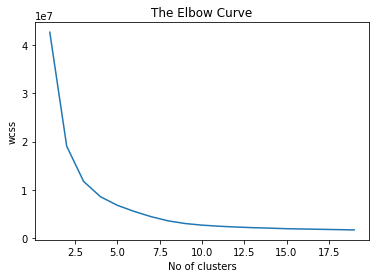

In [36]:
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [37]:
#fit k-means clustering for k=5 

kmeans=KMeans(n_clusters=5) # we are creating 5 clusters
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [38]:
len(kmeans.labels_)

30000

In [60]:
kmeans.labels_

array([2, 2, 6, ..., 2, 2, 2], dtype=int32)

In [39]:
data['cluster']=kmeans.labels_
data.head()

#we have added new column as cluster in our data set 

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,1


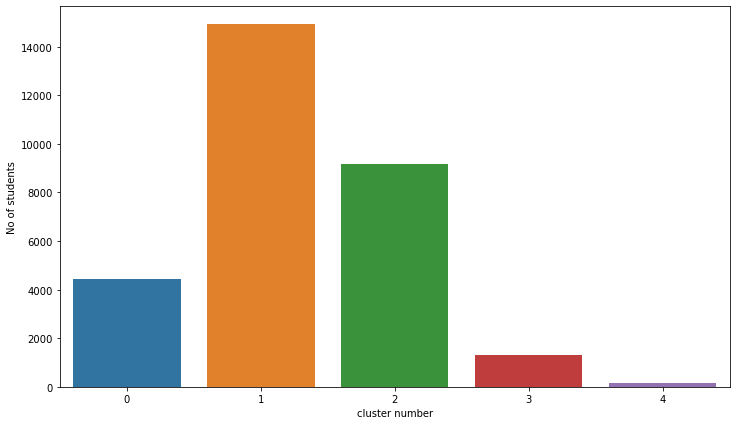

In [40]:
plt.figure(figsize=(12,7))
axis=sns.barplot(x=np.arange(0,5,1),y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel('cluster number')
y=axis.set_ylabel('No of students')

In [41]:
#k-means algorithm has problem that it might converge at a plcae with local minima,so the cluster structure will be different

In [42]:
size_array=list(data.groupby(['cluster']).count()['age'].values)
size_array

[4446, 14916, 9168, 1301, 169]

In [43]:
data.groupby(['cluster']).mean()[['basketball','football','soccer','softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute',
                                  'sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible',
                                  'hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die','death','drunk','drugs']]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.331984,0.284076,0.271480,0.243140,0.182636,0.155870,0.136752,0.128655,0.094017,0.152497,0.398785,0.178812,0.161493,0.150922,0.113585,0.500675,0.312641,0.043410,0.784300,0.278003,0.553306,0.327260,0.149123,0.022717,0.449393,0.129555,0.104363,0.317139,0.442420,0.170265,0.095367,0.078048,0.175214,0.123707,0.089294,0.059604
1,0.223317,0.228748,0.192009,0.121078,0.109413,0.115916,0.086015,0.090708,0.080719,0.127514,0.273666,0.206222,0.126777,0.108541,0.095602,0.363837,0.270850,0.034929,0.681483,0.221239,0.409024,0.200858,0.092786,0.018705,0.395012,0.096340,0.080316,0.219563,0.297600,0.134889,0.054840,0.039823,0.178868,0.101502,0.084071,0.064092
2,0.289376,0.268870,0.245637,0.171793,0.169830,0.150960,0.110275,0.111475,0.094023,0.153796,0.341623,0.226331,0.146924,0.133290,0.107766,0.467277,0.340750,0.047884,0.800502,0.261562,0.484839,0.265925,0.118892,0.023669,0.436409,0.118019,0.120310,0.265161,0.377072,0.156632,0.072208,0.049193,0.192845,0.126418,0.089005,0.056828
3,0.387394,0.296695,0.240584,0.259800,0.196003,0.145273,0.205227,0.136818,0.093005,0.143736,0.477325,0.229823,0.189854,0.202921,0.114527,0.568025,0.287471,0.042275,0.788624,0.255957,0.650269,0.396618,0.161414,0.032283,0.518063,0.157571,0.138355,0.422752,0.482706,0.166795,0.130669,0.090699,0.209070,0.135281,0.115296,0.047656
4,0.331361,0.254438,0.278107,0.213018,0.224852,0.218935,0.177515,0.136095,0.088757,0.130178,0.461538,0.218935,0.195266,0.130178,0.165680,0.467456,0.355030,0.059172,0.698225,0.195266,0.633136,0.236686,0.088757,0.005917,0.662722,0.171598,0.136095,0.325444,0.585799,0.195266,0.130178,0.147929,0.213018,0.165680,0.130178,0.053254


In [58]:
data['cluster'].value_counts()

1    14916
2     9168
0     4446
3     1301
4      169
Name: cluster, dtype: int64

In [59]:
#We can find the cetroid value for each culster
kmeans.cluster_centers_

array([[ 2.00749640e+03,  1.89194746e+00,  1.73661491e+01,
         2.98676185e+01,  3.08720550e-02,  2.38229133e-02,
         1.96356598e-02,  3.19547871e-03,  3.58525556e-02,
         2.10614975e-02,  5.64638829e-03,  7.73018497e-03,
         8.48373321e-03,  3.43316180e-02,  1.45620795e-02,
         6.88310707e-03,  1.46916471e-03,  9.20582059e-03,
         3.32796702e-04,  2.69857885e-02,  2.75658343e-02,
         1.13577546e-02,  4.31646264e-02,  2.16618927e-02,
         8.75741591e-04,  6.75187783e-03,  7.62969047e-03,
        -4.31634809e-04,  1.03437462e-02,  1.38475950e-02,
         1.17519508e-02,  6.69071139e-03,  2.56207313e-02,
         1.95467798e-02, -8.45936653e-03, -8.56565827e-03,
         1.35718105e-02,  2.11520472e-02,  6.53978626e-03,
        -1.29236217e-02],
       [ 2.00780103e+03,  1.99483204e+00,  1.73401480e+01,
         1.95020672e+02,  1.20552307e-01,  1.00230993e-01,
         1.34924893e-02,  4.75634615e-02,  9.93621540e-02,
         1.04898300e-01,  1.34